## 第五题

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [8]:
df=pd.read_excel('/Users/ziman/Desktop/第五题-购买意愿.xlsx')
df.index=df['User id']
df.drop('User id',axis=1,inplace=True)
df=df.replace({'Age':{'<=30':0, '[31,40]':1, '>40':2 } } )
df=df.replace({'Incoming':{'low':0, 'medium':1, 'high':2}})
df=df.replace({'Student':{'no':0, 'yes':1}})
df=df.replace({'Credit Rating':{'fair':0, 'excellent':1}})
df=df.replace({'Buying':{'no':0 ,'yes':1 }})
X=df.drop('Buying',axis=1)
y=df['Buying']

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='gini',max_depth=3)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

import sklearn.metrics
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         2

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



[Text(0.4444444444444444, 0.875, 'Student <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'), Text(0.2222222222222222, 0.625, 'Age <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'), Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'), Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'), Text(0.6666666666666666, 0.625, 'Age <= 1.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'), Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'), Text(0.7777777777777778, 0.375, 'Credit Rating <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'), Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'), Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]


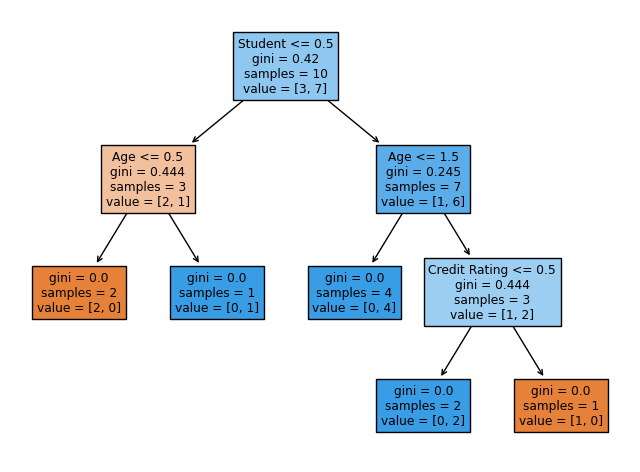

In [10]:
from sklearn.tree import plot_tree
plt.figure(figsize=(8,6),dpi=100)
print(plot_tree(model,feature_names=X.columns,filled=True))

In [11]:
need_to_be_predicted=pd.DataFrame(
    {'Age':[2],'Incoming':[1],'Student':[0],'Credit Rating':[1]})
print(model.predict(need_to_be_predicted))

[1]


## 第九题

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [13]:
ham_list=[]
spam_list=[]
for i in range(1,6):
    ham_path='/Users/ziman/Desktop/enron{}/ham/'.format(i)
    ham_dirs = os.listdir(ham_path)
    spam_path='/Users/ziman/Desktop/enron{}/spam/'.format(i)
    spam_dirs = os.listdir(spam_path)
    for file in ham_dirs:
        ham_list.append(ham_path+file)
    ham_list.sort()
    for file in spam_dirs:
        spam_list.append(spam_path+file)
    spam_list.sort()

contents=[]
y=[]
for i in range(len(ham_list)):
    text=open(ham_list[i],errors='ignore').read()
    contents.append(text)
    y.append(0)
for j in range(len(spam_list)):
    text=open(spam_list[j],errors='ignore').read()
    contents.append(text)
    y.append(1)
    
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(contents,y,test_size=0.2,random_state=123)

In [19]:
pd.DataFrame(contents)

,0
0,Subject: christmas tree farm pictures\n
1,"Subject: vastar resources , inc .\ngary , prod..."
2,Subject: calpine daily gas nomination\n- calpi...
3,Subject: re : issue\nfyi - see note below - al...
4,Subject: meter 7268 nov allocation\nfyi .\n- -...
...,...
27711,"Subject: localized software , all languages av..."
27712,"Subject: localized software , all languages av..."
27713,Subject: branded softs\nnorton internet securi...
27714,Subject: microsoft autoroute 2005 dvd uk - $ 1...


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer as TV
tfi=TV().fit(X_train)
X_train=tfi.transform(X_train)
X_test=tfi.transform(X_test)

In [22]:
feature=pd.DataFrame(X_train.toarray(),columns=tfi.get_feature_names())
feature

/Users/ziman/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,000000,00000000,0000000000,0000000000001110,000000000002858,000000000003619,000000000003991,...,zzrue,zzso,zzsyt,zztc,zzucpkow,zzw,zzxtfeerekvwkug,zzzglvaa,zzzxlqbha,zzzz
0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.099919,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22167,0.081365,0.10759,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22168,0.057379,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22169,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22170,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
pd.DataFrame(X_test.toarray(),columns=tfi.get_feature_names())

/Users/ziman/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,0000,000000,00000000,0000000000,0000000000001110,000000000002858,000000000003619,000000000003991,...,zzrue,zzso,zzsyt,zztc,zzucpkow,zzw,zzxtfeerekvwkug,zzzglvaa,zzzxlqbha,zzzz
0,0.037574,0.079496,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.110357,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5539,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5540,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5541,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5542,0.023985,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
import sklearn.metrics
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2996
           1       0.99      0.97      0.98      2548

    accuracy                           0.98      5544
   macro avg       0.98      0.98      0.98      5544
weighted avg       0.98      0.98      0.98      5544



In [28]:
ham_path='/Users/ziman/Desktop/enron6/ham/'
ham_dirs = os.listdir(ham_path)
ham_list=[]
spam_path='/Users/ziman/Desktop/enron6/spam/'
spam_dirs = os.listdir(spam_path)
spam_list=[]
for file in ham_dirs:
    ham_list.append(ham_path+file)
ham_list.sort()
for file in spam_dirs:
    spam_list.append(spam_path+file)
spam_list.sort()

test_ham=[]
y_ham=[]
test_spam=[]
y_spam=[]
test=[]
y=[]
for i in range(len(ham_list)):
    text=open(ham_list[i],errors='ignore').read()
    test_ham.append(text)
    y_ham.append(0)
    test.append(text)
    y.append(0)
for j in range(len(spam_list)):
    text=open(spam_list[j],errors='ignore').read()
    test_spam.append(text)
    y_spam.append(1)
    test.append(text)
    y.append(1)

test_ham=tfi.transform(test_ham)
test_spam=tfi.transform(test_spam)
test=tfi.transform(test)

In [29]:
print('enron6总体准确率',model.score(test,y))
print('enron6非垃圾邮件准确率',model.score(test_ham,y_ham))
print('enron6垃圾邮件准确率',model.score(test_spam,y_spam))

enron6总体准确率 0.9743333333333334
enron6非垃圾邮件准确率 0.9806666666666667
enron6垃圾邮件准确率 0.9722222222222222
